In [25]:
# Install TensorFlow
!pip install tensorflow-gpu

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1
/device:GPU:0
Num GPUs Available:  1


In [0]:
#imports some required libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

In [47]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [48]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [49]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(i)
x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(512, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [54]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 186us/sample - loss: 0.5182 - accuracy: 0.8058 - val_loss: 0.3777 - val_accuracy: 0.8604
Epoch 2/25
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3504 - accuracy: 0.8714 - val_loss: 0.3413 - val_accuracy: 0.8738
Epoch 3/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3036 - accuracy: 0.8868 - val_loss: 0.3114 - val_accuracy: 0.8859
Epoch 4/25
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2733 - accuracy: 0.8999 - val_loss: 0.3091 - val_accuracy: 0.8921
Epoch 5/25
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2521 - accuracy: 0.9082 - val_loss: 0.3053 - val_accuracy: 0.8921
Epoch 6/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2337 - accuracy: 0.9136 - val_loss: 0.3015 - val_accuracy: 0.8886
Epoch 7/25
60000/60000 [====================

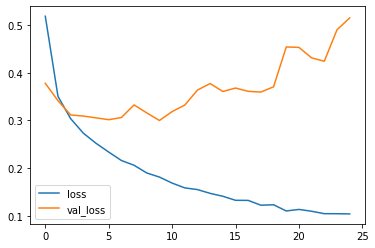

In [55]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

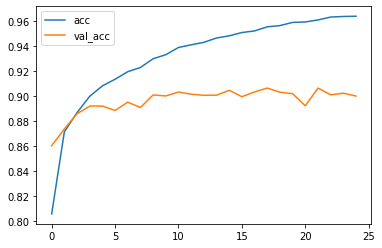

In [57]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[830   2  14  39   5   0 102   0   7   1]
 [  3 982   0  10   1   0   3   0   1   0]
 [ 15   0 843   9  56   0  77   0   0   0]
 [ 12   6  12 915  39   0  16   0   0   0]
 [  0   1  69  27 831   0  71   0   1   0]
 [  0   0   0   0   0 973   0  17   3   7]
 [101   1  61  41  63   0 723   0  10   0]
 [  0   0   0   0   0  10   0 979   0  11]
 [  7   0   3   4   4   2   5   1 974   0]
 [  0   1   0   0   0   5   0  43   0 951]]


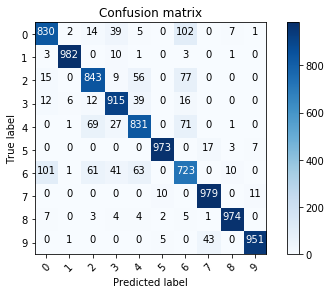

In [60]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

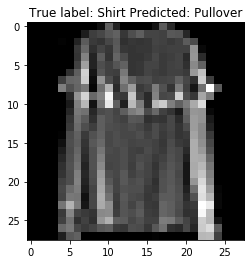

In [62]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));